

# Projet : TMDb movie data

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Conflit de données</a></li>
<li><a href="#eda">L'analyse exploratoire des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Dans ce projet, je vais étudier et analyser l'ensemble de données de films TMDb.

> Cet ensemble de données contient des informations sur 10 000 films collectés à partir de The Movie Database (TMDb), y compris les notes des utilisateurs et les revenus.

> Pour cet enssemble de donnée, je me suis poser quelques questions :

- Quels genres de film sont les plus populaires d'année en année ?
- Quels sont les film les plus populaires d'année en année ?
- Quels types de propriétés sont associés aux films qui génèrent des revenus élevés ?


In [61]:
# importation de package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Conflit de données

> Dans cette section du rapport, je vais explorer l'ensemble des données et vérifier s'il doit être nettoyé.

### Les propriétés générales

In [62]:
# Chargement de données
df = pd.read_csv('tmdb-movies.csv')
# afficher la première ligne de mon ensssemble de donnée
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [63]:
# vérifier le nombre de colonne et de ligne
df.shape

(10866, 21)

In [64]:
# afficher la description de mon enssemble de donnée
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Nettoyage des données : TMDb movie
> Dans cette partie, je vais supprimer toutes les colonnes qui ne vont pas m'aider a resoudre mes problemes.
> en d'autre terme, je vais effectuer un néttoyage approfondire

In [66]:
# suppression de toute les colonnes qui ne me serviront pas.
df.drop(['id' ,'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


### nous constactons qu'il y a des valeurs manquante dans la colonne Genres

In [68]:
# suppression de toute les ligne qui ont des valeur manquante
df.dropna(inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   budget          10843 non-null  int64  
 2   revenue         10843 non-null  int64  
 3   original_title  10843 non-null  object 
 4   runtime         10843 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10843 non-null  object 
 7   vote_count      10843 non-null  int64  
 8   vote_average    10843 non-null  float64
 9   release_year    10843 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 931.8+ KB


In [70]:
# vérifions s'il y a des ligne qui se répète
sum(df.duplicated())

1

In [71]:
# suppression de toute les ligne duplicé
df.drop_duplicates(inplace=True)

> La colonne Budget et Revenue sont 2 colonne très importante pour notre analyse,
> donc je vais supprimer tous les revenus et budgets dons la valeur est égale à 0

In [72]:
# verification des budgets dons la valeur est egale à zéro
df[df.budget == 0].count()

popularity        5674
budget            5674
revenue           5674
original_title    5674
runtime           5674
genres            5674
release_date      5674
vote_count        5674
vote_average      5674
release_year      5674
dtype: int64

In [73]:
# verification des revenus dons la valeur est egale à zéro
df[df.revenue == 0].count()

popularity        5993
budget            5993
revenue           5993
original_title    5993
runtime           5993
genres            5993
release_date      5993
vote_count        5993
vote_average      5993
release_year      5993
dtype: int64

In [74]:
# suppresion des budgets dons la valeur est egale à zéro
df.drop(df[df.budget == 0].index, inplace=True)

In [75]:
# suppression des revenus dons la valeur est egale à zéro
df.drop(df[df.revenue == 0].index, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   budget          3854 non-null   int64  
 2   revenue         3854 non-null   int64  
 3   original_title  3854 non-null   object 
 4   runtime         3854 non-null   int64  
 5   genres          3854 non-null   object 
 6   release_date    3854 non-null   object 
 7   vote_count      3854 non-null   int64  
 8   vote_average    3854 non-null   float64
 9   release_year    3854 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 331.2+ KB


###  D'après notre info nous constactons que notre enssemble de donnée est près pour répondre à nos question  

In [77]:
df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


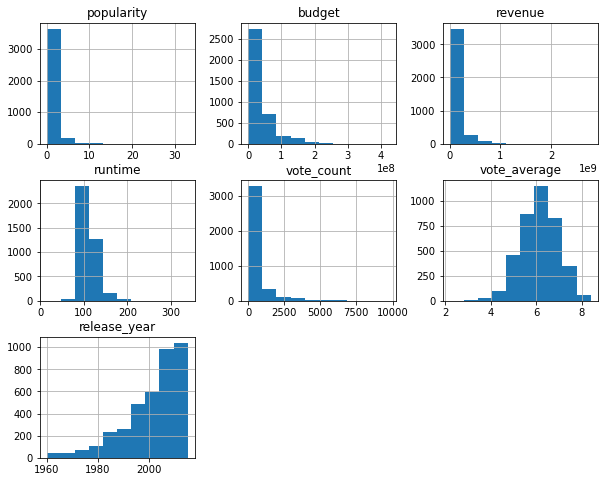

In [78]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## L'analyse exploratoire des données


### Question de recherche 1 : Quels genres de film sont les plus populaires d'année en année ?

In [79]:
# créons une fonction qui va compter le nombre de chaque genre
def data(x):
    #concaténons toutes les lignes du genre en une chaine de caractère.
    data_plot = df[x].str.cat(sep = '|')
    #convertisons cette chaine de caractère en une liste puis en une Series
    data = pd.Series(data_plot.split('|'))
    #comptons le nombre de chacun des genre.
    info = data.value_counts(ascending=False)
    return info

In [80]:
total_genre_movies = data('genres')
print(total_genre_movies)

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64


Text(0, 0.5, 'Genre')

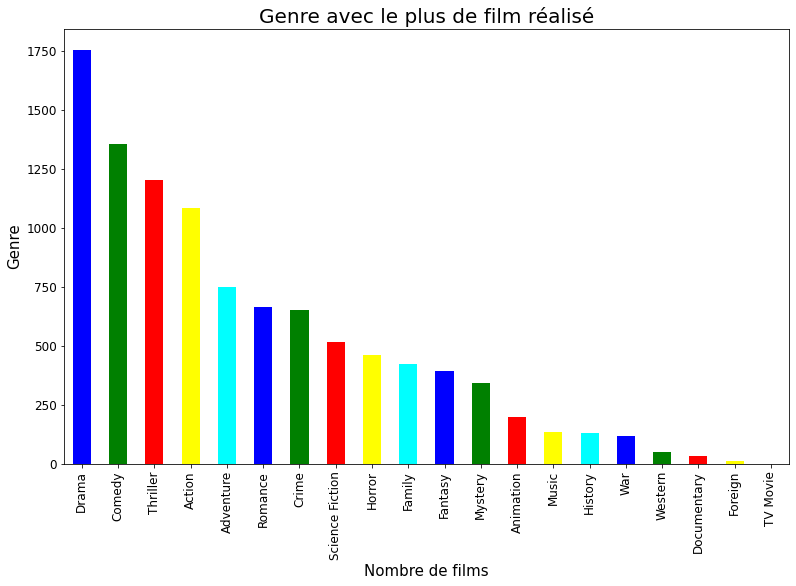

In [81]:
# affichage des genres les plus populaires d'année en année en fonction des films réalisé
total_genre_movies.plot(kind= 'bar',figsize = (13,8),fontsize=12,color=['blue', 'green', 'red', 'yellow', 'cyan'])
#setup the title and the labels of the plot.
plt.title("Genre avec le plus de film réalisé",fontsize=20)
plt.xlabel('Nombre de films',fontsize=15)
plt.ylabel("Genre",fontsize= 15)

> Comme nous pouvons le voir ci-dessus, le graphique nous motre les genre de films les plus populaire depuis 1960 à 2015.
> Dont Drama qui est le genre le plus populaire avec 1756 films réalisé suivie de Comédie(1358) et Thriller(1204)

### Question de recherche 2 : Quels sont les film les plus populaires d'année en année ?

In [82]:
# nous créons un nouveau DataFrame afin de stocker les films les plus populaire d'année en année
df_movies = df.groupby(["release_year"]).apply(lambda x : df[df['popularity'] == x.popularity.max()])

In [83]:
# Définissons l'index pour qu'il devienne la colonne "release_year"
df_movies = df_movies.set_index('release_year')

In [84]:
# affichage des film les plus populaires d'année en année(prémière ligne)
df_movies.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average
release_year,,,,,,,,,
1960,2.610362,806948,32000000,Psycho,109,Drama|Horror|Thriller,8/14/60,1180,8.0


Text(0, 0.5, 'Popularité')

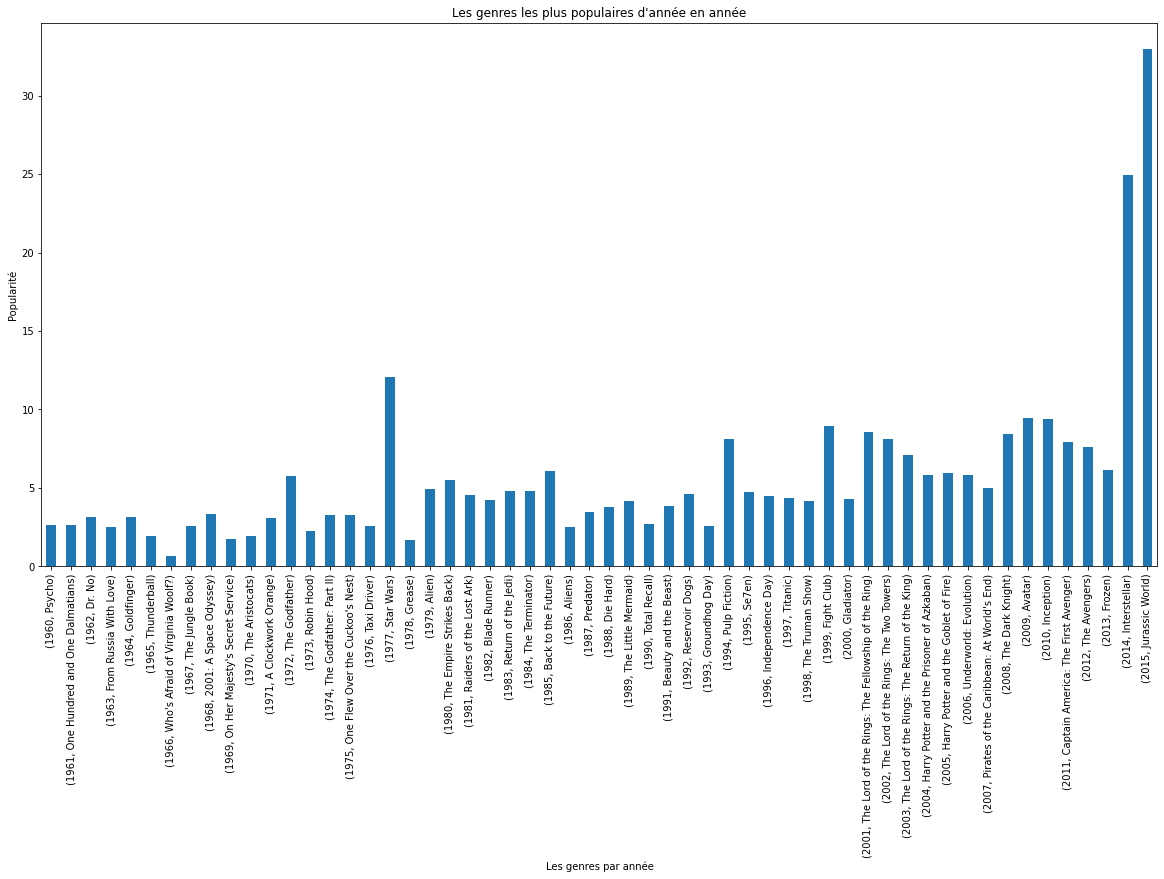

In [85]:
# nous régroupons les années et les titres en fonction de leur popularité
df_movies.groupby(["release_year", "original_title"])["popularity"].max().plot(kind='bar',figsize=(20,10))
plt.title("Les genres les plus populaires d'année en année")
plt.xlabel('Les genres par année')
plt.ylabel('Popularité')

> Comme nous pouvons le voir ci-dessus, le graphique nous motre les films qui on été les plus populaire de 1960 à 2015.

### Question de recherche 3 : Quels types de propriétés sont associés aux films qui génèrent 
### des revenus élevés ?

In [86]:
# vérifier le revenu moyen pour chaque année
df.groupby(['release_year'])['revenue'].mean().tail(1)

release_year
2015    1.637683e+08
Name: revenue, dtype: float64

Text(0.5, 0, 'année')

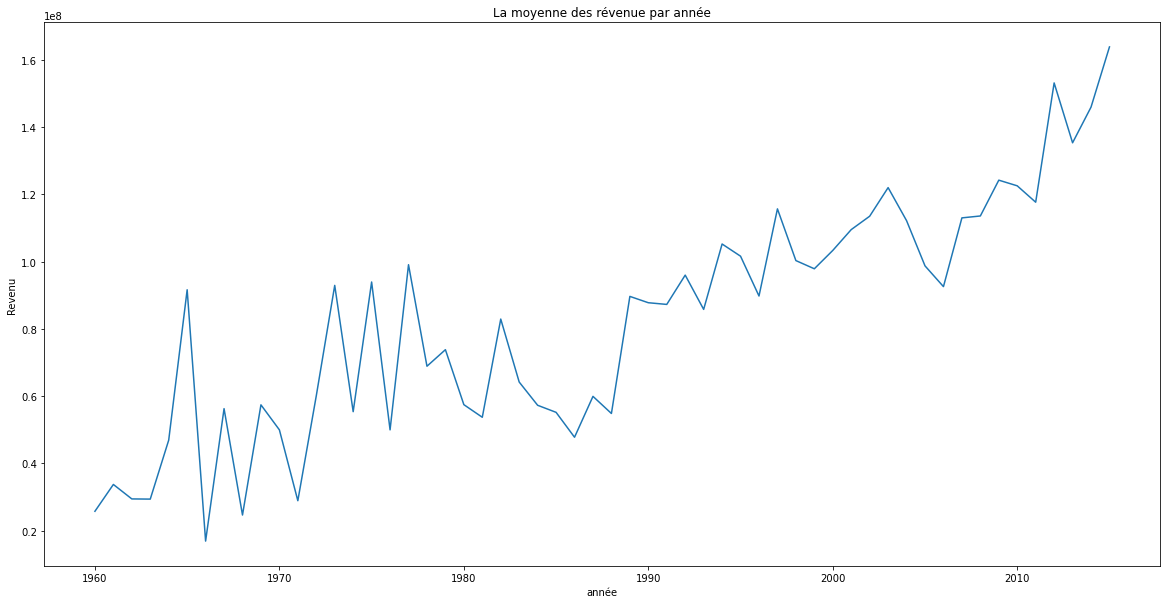

In [87]:
df.groupby('release_year')['revenue'].mean().plot(kind='line',figsize=(20,10));
plt.title('La moyenne des révenue par année')
plt.ylabel('Revenu')
plt.xlabel('année')

> Le graphique ci-dessus montre que les revenus ont augmenté au cours des dernières années.

# <a id='conclusions'></a>
## Conclusions

> En conclusion, après avoire effectué notre analyse dans cet ensemble de données de films TMDb, nous pouvons constater que 
> le genre le plus populaire est le genre dramatique.

> ensuite , nous pouvons constater que chaque année a eu des films populaires qui on marqué leurs epoque.

> Enfin,nous pouvons constater que les films obtiennent des revenus plus élevés au fil des ans.

> Mais, Cet ensemble de données n'est pas vraiment une représentation efficace de l'industrie du cinéma en raison du grand nombre de valeurs manquantes, ces valeurs erronées dans l'ensemble de données.



# <a id='reference'></a>
## reference

> Livre : python Data Analytics with pandas, numpy, and matplotlib second edition Fabio Nelli

> site web : 

- https://pandas.pydata.org/docs/reference/ , 
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html
- https://udacity-reviews-uploads.s3.us-west-2.amazonaws.com/_attachments/83662/1595509908/How-to-Visualize-your-Data-with-Charts-and-Graphs.jpg
- https://stackoverflow.com/questions/35640364/python-pandas-max-value-in-a-group-as-a-new-column
